## Load the necessary libraries

In [40]:
#Loading the required packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the data from Yahoo Finance 
The dataset used is a portfolio made up of stocks from 10 markets for the period 01/01/2018 to 31/12/2021<br>
The ten markets are:
<ul>
    <li>Tesla</li>
    <li>Facebook</li>
    <li>Amazon</li>
    <li>Apple</li>
    <li>Google</li>
    <li>Walmart</li>
    <li>Coca Cola</li>
    <li>Sony Group Corp</li>
    <li>Twitter</li>
    <li>Oil</li>
</ul>
    

In [2]:
# Read Dataset from Yahoo Finance
portfolio_dataset = data.DataReader(['TSLA', 'FB', 'AMZN', 'AAPL', 'GOOGL', 'WMT', 'KO', 'SONY', 'TWTR', 'OIL'], 'yahoo', start='2018/01/01', end='2021/12/31')
portfolio_dataset.head()

Attributes  Adj Close                                                   \
Symbols          AAPL         AMZN          FB        GOOGL         KO   
Date                                                                     
2018-01-02  41.135754  1189.010010  181.419998  1073.209961  39.993095   
2018-01-03  41.128597  1204.199951  184.669998  1091.520020  39.905273   
2018-01-04  41.319630  1209.589966  184.330002  1095.760010  40.467335   
2018-01-05  41.790070  1229.140015  186.850006  1110.290039  40.458542   
2018-01-08  41.634850  1246.869995  188.279999  1114.209961  40.397068   

Attributes                                                         ...  \
Symbols           OIL       SONY       TSLA       TWTR        WMT  ...   
Date                                                               ...   
2018-01-02  17.709999  45.790001  64.106003  24.510000  91.389336  ...   
2018-01-03  18.070000  46.299999  63.450001  24.450001  92.186531  ...   
2018-01-04  18.040001  47.250000  62.924000  23.990000  92.269951  ...   
2018-01-05  18.030001  48.700001  63.316002  24.320000  92.816864  ...   
2018-01-08  18.030001  49.000000  67.281998  24.590000  94.188766  ...   

Attributes       Volume                                                        \
Symbols            AAPL       AMZN          FB      GOOGL          KO     OIL   
Date                                                                            
2018-01-02  102223600.0  2694500.0  18151900.0  1588300.0  10872200.0     0.0   
2018-01-03  118071600.0  3108800.0  16886600.0  1565900.0  12635600.0  1800.0   
2018-01-04   89738400.0  3022100.0  13880900.0  1302600.0  12709400.0   100.0   
2018-01-05   94640000.0  3544700.0  13574500.0  1512500.0  13113100.0   400.0   
2018-01-08   82271200.0  4279500.0  17994700.0  1232200.0   7068600.0     0.0   

Attributes                                                 
Symbols          SONY        TSLA        TWTR         WMT  
Date                                                       
2018-01-02   844200.0  21761000.0  15297200.0  10150500.0  
2018-01-03   612500.0  22607500.0  12832600.0   8903600.0  
2018-01-04   770600.0  49731500.0  17653500.0   6830400.0  
2018-01-05  1356100.0  22956000.0  14953200.0   7284000.0  
2018-01-08   618900.0  49297000.0  17831300.0   8843900.0  

[5 rows x 60 columns]

In [3]:
# Save the dataset to an excel file
portfolio_dataset.to_excel("portfolio.xlsx")

## Closing price of company's stock on each day
For this project, we will focus on the '**Adj Close**' column which gives the closing price of company's stock on a given day

In [4]:
portfolio_Close_price = portfolio_dataset['Adj Close']
portfolio_Close_price.head()

Symbols,AAPL,AMZN,FB,GOOGL,KO,OIL,SONY,TSLA,TWTR,WMT
Date,,,,,,,,,,
2018-01-02,41.135754,1189.010010,181.419998,1073.209961,39.993095,17.709999,45.790001,64.106003,24.510000,91.389336
2018-01-03,41.128597,1204.199951,184.669998,1091.520020,39.905273,18.070000,46.299999,63.450001,24.450001,92.186531
2018-01-04,41.319630,1209.589966,184.330002,1095.760010,40.467335,18.040001,47.250000,62.924000,23.990000,92.269951
2018-01-05,41.790070,1229.140015,186.850006,1110.290039,40.458542,18.030001,48.700001,63.316002,24.320000,92.816864
2018-01-08,41.634850,1246.869995,188.279999,1114.209961,40.397068,18.030001,49.000000,67.281998,24.590000,94.188766


## Calculate Percentage change in stock prices
Calculate the percentage change in stock prices for each company everyday. Take the log of the percentage change since the log of the returns is **time additive**.

In [5]:
#Log of percentage change for each company
tesla = portfolio_Close_price['TSLA'].pct_change().apply(lambda x: np.log(1+x))
fb = portfolio_Close_price['FB'].pct_change().apply(lambda x: np.log(1+x))
amazon = portfolio_Close_price['AMZN'].pct_change().apply(lambda x: np.log(1+x))
apple = portfolio_Close_price['AAPL'].pct_change().apply(lambda x: np.log(1+x))
google = portfolio_Close_price['GOOGL'].pct_change().apply(lambda x: np.log(1+x))
walmart = portfolio_Close_price['WMT'].pct_change().apply(lambda x: np.log(1+x))
cocacola = portfolio_Close_price['KO'].pct_change().apply(lambda x: np.log(1+x))
sony = portfolio_Close_price['SONY'].pct_change().apply(lambda x: np.log(1+x))
twitter = portfolio_Close_price['TWTR'].pct_change().apply(lambda x: np.log(1+x))
oil = portfolio_Close_price['OIL'].pct_change().apply(lambda x: np.log(1+x))
oil.head() #for testing

Date
2018-01-02         NaN
2018-01-03    0.020124
2018-01-04   -0.001662
2018-01-05   -0.000554
2018-01-08    0.000000
Name: OIL, dtype: float64

## Calculate the variance in prices of stock for each company
The variance in prices indicate how volatile the investment will be.  It demonstrates how returns can fluctuate.

In [6]:
#variance in prices for each company
var_tesla = tesla.var()
var_fb = fb.var()
var_amazon = amazon.var()
var_apple = apple.var()
var_google = google.var()
var_walmart = walmart.var()
var_cocacola = cocacola.var()
var_sony = sony.var()
var_twitter = twitter.var()
var_oil = oil.var()
print(var_google)           #for testing

0.0003407132821501521


In [16]:
#save the variance in a dataframe
df_variance = pd.DataFrame([['Tesla', var_tesla],
                            ['Facebook', var_fb],
                           ['Amazon', var_amazon],
                           ['Apple', var_apple],
                           ['Google', var_google],
                           ['Walmart', var_walmart],
                           ['Coca Cola', var_cocacola],
                           ['Sony', var_sony],
                           ['Twitter', var_twitter],
                           ['Oil', var_oil]],
                   columns=['Company', 'Variance'])
df_variance = df_variance.set_index('Company')
df_variance

,Variance
Company,
Tesla,0.001670
Facebook,0.000525
Amazon,0.000386
Apple,0.000430
Google,0.000341
Walmart,0.000202
Coca Cola,0.000195
Sony,0.000354
Twitter,0.001109


## Calculate the Volatility of each company
Volatility is the standard deviation of a company's stock. This is the square root of variance calculated above.
The variance calculated above is for daily. To obtain the daily standard deviation, find the square root of the variance.
For the annual standard deviation for each company, multiply the daily standard deviation by 250 since there are 250 trading days in a year.

In [17]:
#Calculating the volatility of each company
df_variance["Volatility"] = np.sqrt(df_variance["Variance"] * 250) 
df_variance

,Variance,Volatility
Company,,
Tesla,0.001670,0.646213
Facebook,0.000525,0.362326
Amazon,0.000386,0.310523
Apple,0.000430,0.327864
Google,0.000341,0.291853
Walmart,0.000202,0.224847
Coca Cola,0.000195,0.220833
Sony,0.000354,0.297390
Twitter,0.001109,0.526471


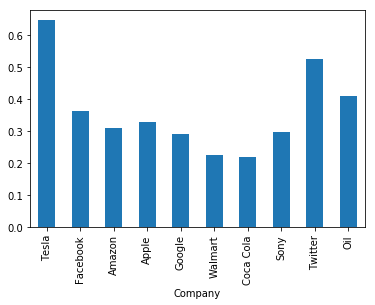

In [9]:
#Plot the volatility of each company for better visualization
df_variance['Volatility'].plot.bar()

## Calculate the Covariance between the different stocks
The covariance indicates the relationship between the different variables. This will help determine if returns
on each of the stocks move together or inversely

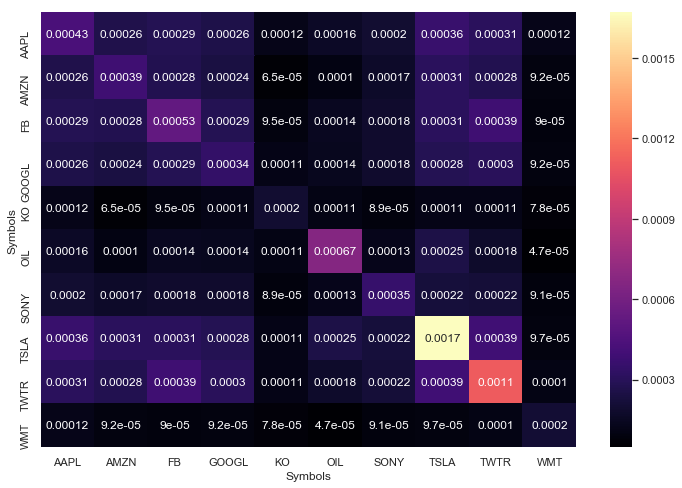

In [41]:
#calculate the covarince matrix
cov_matrix = portfolio_Close_price.pct_change().apply(lambda x: np.log(1+x)).cov()

#set the figure size 
sns.set(rc={'figure.figsize': (12, 8)})
#plot a heatmap to indicate the relationship
sns.heatmap(cov_matrix, cmap='magma', annot=True)

The figure above illustrates that there is a small positive covariance between various stocks

## Calculate Expected returns
Expected returns of an asset is the mean percentage change in its stock prices. We calculate the value of the daily expected returns.
Define the weights for the assets choosen in order to calculate the expected returns.
The weights of an assets is the percentage of the investor's total money to be held in each company's stock. The decision for each weight is done using the optimization technique to be developed later

### percentage change in each stock

In [38]:
df_portfolio_change = portfolio_Close_price.pct_change().apply(lambda x: np.log(1+x))
df_portfolio_change.head()

Symbols,AAPL,AMZN,FB,GOOGL,KO,OIL,SONY,TSLA,TWTR,WMT
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.012694,0.017756,0.016917,-0.002198,0.020124,0.011076,-0.010286,-0.002451,0.008685
2018-01-04,0.004634,0.004466,-0.001843,0.003877,0.013987,-0.001662,0.020311,-0.008325,-0.018993,0.000904
2018-01-05,0.011321,0.016033,0.013579,0.013173,-0.000217,-0.000554,0.030226,0.006210,0.013662,0.005910
2018-01-08,-0.003721,0.014322,0.007624,0.003524,-0.001521,0.000000,0.006141,0.060755,0.011041,0.014673


### Weights

Define an array of random weights for the calculations. The weights represent the allocation
of investments between the stocks and must sum up to 1.
To ensure the weights sum up to 1, we divide the weights by their cumulative sum. We assume that an investment of 10, 000 dollars is made

In [46]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df_portfolio_change.columns)
num_portfolios = 10000

# Yearly returns for individual companies
ind_er = portfolio_Close_price.resample('Y').last().pct_change().mean()


# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = portfolio_Close_price.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))


Symbols
AAPL     0.686376
AMZN     0.338869
FB       0.375971
GOOGL    0.414419
KO       0.114803
OIL      0.239384
SONY     0.381821
TSLA     2.729642
TWTR     0.200957
WMT      0.184854
dtype: float64

In [47]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [49]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(portfolio_Close_price.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]



In [50]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,AMZN weight,FB weight,GOOGL weight,KO weight,OIL weight,SONY weight,TSLA weight,TWTR weight,WMT weight
0,0.489042,0.229317,0.141306,0.093672,0.038300,0.083275,0.092609,0.110464,0.034196,0.072329,0.131905,0.201944
1,0.360537,0.203086,0.136545,0.068499,0.061557,0.144279,0.196868,0.020143,0.131881,0.014945,0.028031,0.197252
2,0.562956,0.234253,0.011706,0.020657,0.067731,0.122699,0.151460,0.147453,0.148542,0.117669,0.112160,0.099923
3,0.493768,0.237715,0.081059,0.013419,0.034268,0.104302,0.139916,0.145868,0.095086,0.084886,0.174020,0.127176
4,0.476492,0.242215,0.065573,0.196703,0.066222,0.172835,0.020349,0.054436,0.200431,0.052485,0.095630,0.075336


## Plotting the efficient frontier
Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis.
Efficient frontier shows the maximum returns obtained for a set level of volatility or the volatility we need to accept for certain levels of returns.
Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.
The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


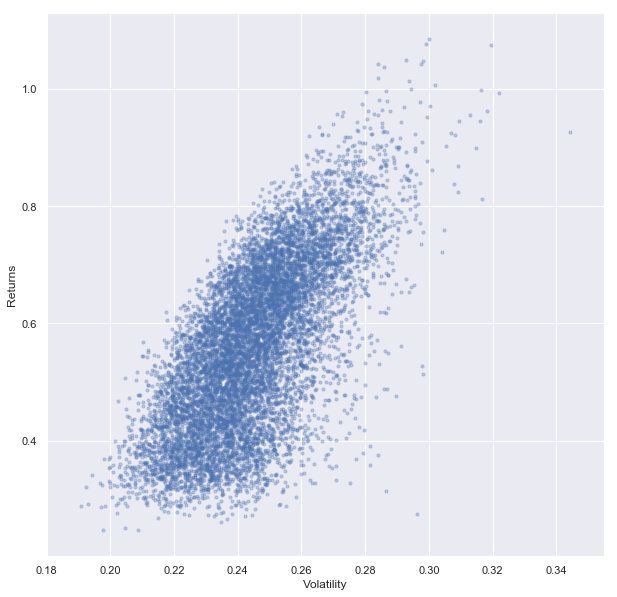

In [51]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

### plotting the minimum volatility point
Minimum volatility is the leftmost point

Returns         0.288082
Volatility      0.190673
AAPL weight     0.036334
AMZN weight     0.175523
FB weight       0.020146
GOOGL weight    0.115732
KO weight       0.159549
OIL weight      0.050696
SONY weight     0.142394
TSLA weight     0.003078
TWTR weight     0.005449
WMT weight      0.291100
Name: 3695, dtype: float64


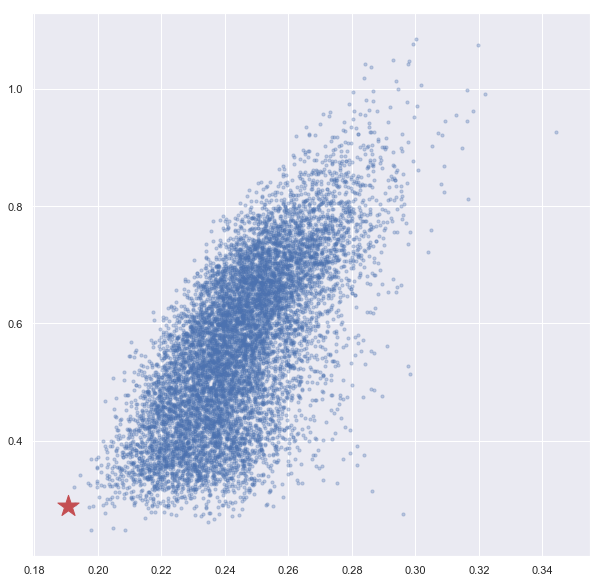

In [52]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
print(min_vol_port)

# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The returns at the minimum volatility point are very low and any sensible investor will want to maximize on returns. To find find the optimal risky portfolio, use the following technique to optimize the portfolio to the  maximum

## Optimizing the portfolio

In [53]:
#Assume a risk factor of 0.01
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         1.042552
Volatility      0.284042
AAPL weight     0.072344
AMZN weight     0.040045
FB weight       0.053788
GOOGL weight    0.021408
KO weight       0.213518
OIL weight      0.001014
SONY weight     0.128500
TSLA weight     0.310046
TWTR weight     0.039928
WMT weight      0.119409
Name: 6558, dtype: float64

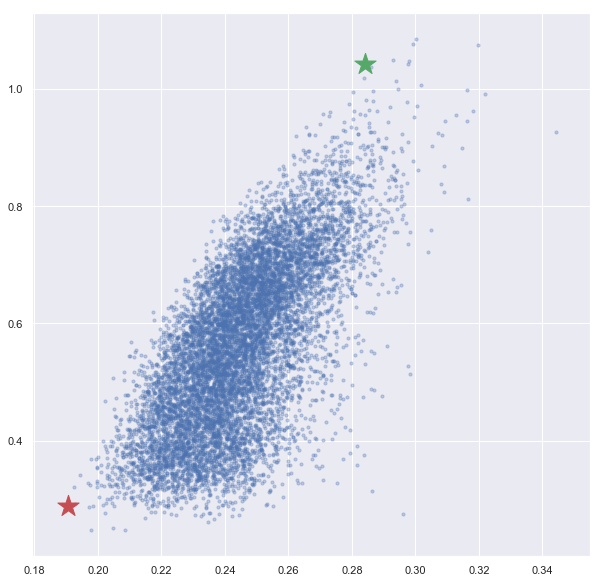

In [54]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The optimal risky portfolio is marked with the green star

## Reference List
https://www.youtube.com/watch?v=Mb4H3MaJnl8&list=PLLVfjXL2pnkQQXmBMPu_NIst57AKak5Z1
https://www.investopedia.com/terms/p/portfoliomanagement.asp
https://www.machinelearningplus.com/